In [1]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import gc
import warnings
import numpy as np
import powerlaw
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline 

In [3]:
def remove_useless_data(df):
    df_1 = df[df["parent"] == df["to"]]
    # delete duplicate rows from dataframe
    new_df = df.drop(df_1.index)
    #delete useless data to free memory
    del df,df_1
    gc.collect()
    #reset the indexes in the new DataFrame
    new_df.reset_index(inplace=True,drop=True)
    return new_df

In [4]:
if __name__=="__main__":

    data = pd.read_csv("data_subreddit_cleaned.csv",index_col=0)
    no_duplicates = remove_useless_data(data)
    G = nx.convert_matrix.from_pandas_edgelist(no_duplicates,source = "parent",target="to",
                                                            edge_attr=True)

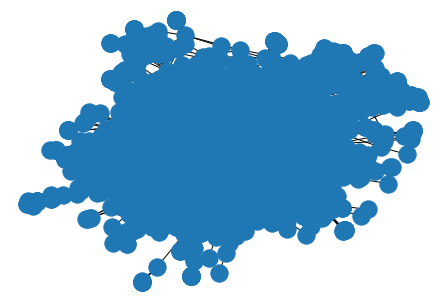

In [5]:
nx.draw(G)
plt.show()

In [9]:
G.number_of_nodes()

24819

In [10]:
G.number_of_edges()

104284

In [11]:
G.is_directed()

False

In [12]:
data.head()

,from,to,id,title,score,date,comments,parent
0,environment,environment,mx0fiv,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",1656.0,1.619228e+09,90.0,nature
1,environment,EcoNewsNetwork,mx6no0,"MT Gov. Greg Gianforte Illegally Trapped, Kill...",8.0,1.619245e+09,0.0,nature
2,environment,environment,mwumok,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1216.0,1.619211e+09,33.0,WomenInNews
3,environment,TheFightThatMatters,mx3brt,"Tax breaks for fossil fuels 'a disgrace,' Gret...",1.0,1.619236e+09,0.0,WomenInNews
4,environment,EcoNewsNetwork,mx34qj,"Tax breaks for fossil fuels 'a disgrace,' Gret...",2.0,1.619235e+09,0.0,WomenInNews


In [14]:
data.shape

(208841, 8)

In [16]:
for n in G.nodes():
    # do something
    pass
for e in G.edges():
    # do something
    pass

In [18]:
G.degree()

DegreeView({'nature': 25, 'environment': 309, 'EcoNewsNetwork': 160, 'WomenInNews': 15, 'TheFightThatMatters': 123, 'HydroHomies': 168, 'news': 1101, 'environmental_science': 16, 'furry_irl': 42, 'climate': 85, 'uspolitics': 97, 'RuralNewsNetwork': 182, 'anime_titties': 105, 'cleanstreetbets': 10, 'AnythingGoesNews': 81, 'BigTent': 73, 'ClimateDenialism': 12, 'CANNABISfuturus': 43, 'weed': 69, 'Alternative_Energy': 2, 'energy': 156, 'worldnews': 1151, 'Anarchism': 262, 'politics': 1209, 'vegan': 164, 'BigAgro': 9, 'mexico': 45, 'mejico': 14, 'ALLTHEANIMALS': 49, 'Jaguarland': 13, 'UpliftingNews': 257, 'Positive_News': 62, 'ABoringDystopia': 297, 'conservation': 19, 'landconservation': 28, 'water': 27, 'SocialismAndVeganism': 21, 'NatureIsFuckingLit': 926, 'GorillaReddit': 11, 'PublicLands': 9, 'massachusetts': 27, 'BlackLivesMatter': 114, 'AntifascistsofReddit': 143, 'OkBuddyPoliceOfficer': 48, 'Bad_Cop_No_Donut': 326, 'PoliceAccountability1': 20, 'EarningTheHate': 28, 'MAGAs': 89, 'Al

In [19]:
G.degree('JustGuysBeingDudes')

72

In [20]:
sum(dict(G.degree()).values())/float(len(G))

8.403561787340344

In [22]:
def plot_dist(G):
    M = nx.to_scipy_sparse_matrix(G)
    xmin = min([d[1] for d in G.degree()])
    indegrees = M.sum(0).A[0]
    degree = np.bincount(indegrees)
    fit = powerlaw.Fit(np.array(degree)+1, fit_method='KS')#, xmin=xmin, xmax=max(degree)-xmin,discrete=True)
    
    
    fig = plt.figure(figsize=(16, 6)) 
    """ Plot Distribution """
    plt.subplot(1, 3, 1)
    plt.plot(range(len(degree)),degree,'b.')   
    plt.loglog()
    plt.xlim((min(degree), max(degree)))
    plt.xlabel('Degree')
    plt.ylabel('P(k)')


    """ Plot CDF """
    plt.subplot(1, 3, 2)
    fit.plot_cdf()
    plt.xlabel("Degree")
    plt.ylabel('CDF')

    """ Plot CCDF """
    plt.subplot(1, 3, 3)
    fit.plot_ccdf()
    plt.ylabel('CCDF')
    plt.xlabel('Degree')
    plt.tight_layout()
    plt.show()

Calculating best minimal value for power law fit


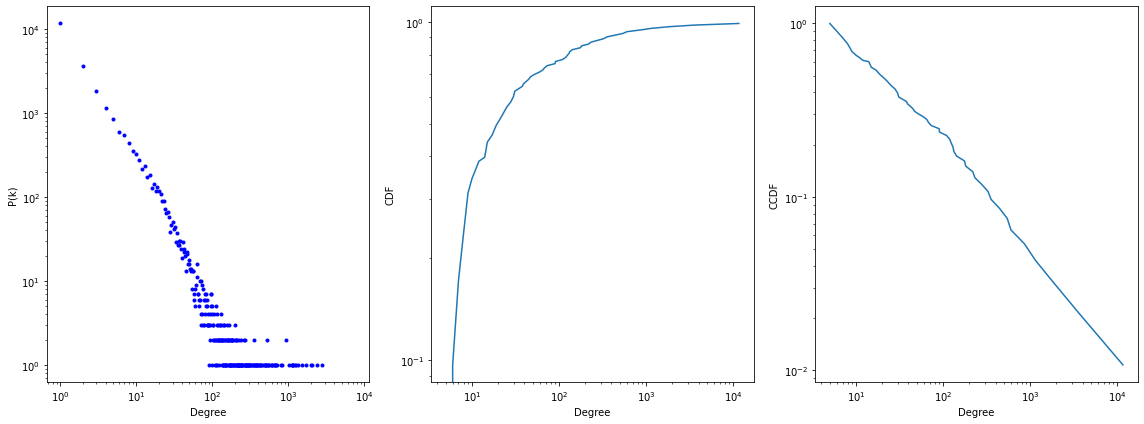

In [23]:
plot_dist(G)

In [26]:
list(G.neighbors('environment'))

['nature',
 'WomenInNews',
 'HydroHomies',
 'EcoNewsNetwork',
 'news',
 'climate',
 'anime_titties',
 'cleanstreetbets',
 'BigTent',
 'ClimateDenialism',
 'CANNABISfuturus',
 'Alternative_Energy',
 'worldnews',
 'politics',
 'vegan',
 'BigAgro',
 'mexico',
 'technology',
 'IAmA',
 'DoomsdayNow',
 'DoomsdayBook',
 'greeninvestor',
 'DivineRightOfKings',
 'ClimateOffensive',
 'VeganLibs',
 'RenewableEnergy',
 'energy',
 'LockCarbon',
 'Toadbook',
 'SGU',
 'GoodRisingTweets',
 'Reterra',
 'organic',
 'GreenNewDeal',
 'NewDealAmerica',
 'space',
 'left_urbanism',
 'EnoughMuskSpam',
 'bicycling',
 'patient_hackernews',
 'canadaleft',
 'CitizenPlanners',
 'KochWatch',
 'TaiwanChina',
 'taiwan',
 'TheEndOfHumanityShow',
 'Foodforthought',
 'soundsaboutright',
 'economy',
 'CapitalismInDecay',
 'TrueReddit',
 'Allopatria',
 'AnythingGoesNews',
 'ABoringDystopia',
 'Indigenous',
 'Hozhor',
 'Economics',
 'science',
 'worldpolitics2',
 'AnimalRightsAdvocates',
 'PlantBased4ThePlanet',
 'sustaina

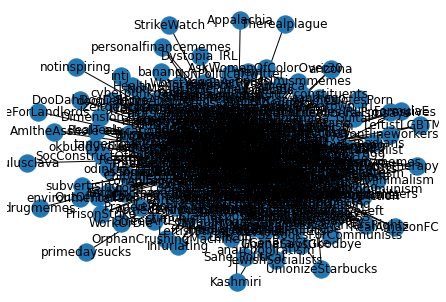

In [27]:
ego = nx.ego_graph(G, 'LateStageCapitalism') # ego network of the node 'LateStageCapitalism'
nx.draw(ego, with_labels=True)

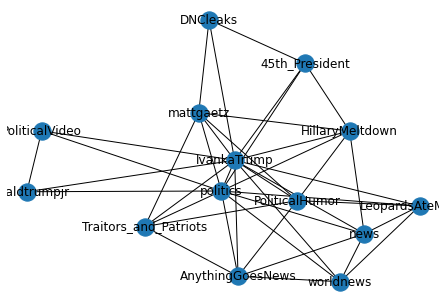

In [28]:
ego = nx.ego_graph(G, 'IvankaTrump') # ego network of the node chosen
nx.draw(ego, with_labels=True)

In [29]:
nx.number_connected_components(G)

1

In [30]:
comps = list(nx.connected_components(G)) # get a list of connected components (for decreasing size)
comp_1 = nx.subgraph(G, comps['StrikeWatch']) # build a subgraph on the second component
nx.draw(comp_1)

IndexError: list index out of range

In [33]:
nx.shortest_path(G, source='DoomsdayBook', target='whygoogle')

['DoomsdayBook', 'todayilearned', 'StallmanWasRight', 'whygoogle']

In [34]:
nx.shortest_path_length(G, source='DoomsdayBook', target='whygoogle')

3

In [38]:
nx.diameter(G.subgraph(comps[0]))

KeyboardInterrupt: 

In [39]:
nx.density(G)

0.0003386075343436354

In [42]:
nx.triangles(G)['environment']

2527

In [43]:
nx.clustering(G)['environment']

0.05310385407472786

In [44]:
nx.average_clustering(G)

0.16543294352606996